In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [53]:
sns.set()
data = pd.read_csv("data_uniform.csv", dtype={'time':np.float64})

data['r_squared'] = data['fbest']
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1_true", "nPop"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,f1,grad,grad_true,r_squared,time_minutes,1,2,3,4,5,6
0,NaN,NaN,418.418370,0.998981,14.385003,169.245624,570.241078,1059.026487,1416.316342,1836.703898,2266.838552
1,NaN,50.0,249.918820,0.934913,13.106198,55.092651,344.346459,508.695649,534.807501,1030.799890,1387.429964
2,NaN,400.0,403.688577,0.977616,11.527866,124.048920,572.231411,956.482544,1103.947261,1704.792391,2240.839428
3,100.0,NaN,437.907511,0.972053,12.017919,148.762628,543.812202,1072.411823,1189.929997,1768.169874,2455.996966
4,100.0,50.0,344.516460,0.945613,12.280808,96.080483,590.746832,800.754847,881.109852,1415.575725,1996.727369


In [54]:
data.describe()

,f1,grad,grad_true,r_squared,time_minutes,1,2,3,4,5,6
count,6.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,200.000000,225.000000,397.411775,0.966381,12.129131,139.360327,621.132535,1057.417747,1221.546343,1665.301157,2261.915857
std,109.544512,191.702895,65.638517,0.019198,1.371138,41.662975,173.997488,294.823782,378.280130,292.162169,396.790154
min,100.000000,50.000000,249.918820,0.934913,10.492278,55.092651,344.346459,508.695649,534.807501,1030.799890,1387.429964
25%,100.000000,50.000000,389.853901,0.958399,11.135997,124.048920,543.812202,956.482544,1030.015330,1567.720138,2217.928491
50%,200.000000,225.000000,418.418370,0.967449,12.017919,148.762628,572.231411,1059.026487,1189.929997,1768.169874,2266.838552
75%,300.000000,400.000000,437.907511,0.977616,13.106198,169.245624,726.208152,1327.444776,1536.004677,1836.703898,2462.999749
max,300.000000,400.000000,467.966188,0.998981,14.385003,183.966386,896.525601,1413.351186,1662.067652,1944.511300,2764.869520


### Grouping by first frequency

In [55]:
errors = data.drop(['time_minutes', 'grad_true'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.head()

,f1,grad,r_squared
0,NaN,NaN,0.998981
1,NaN,50.0,0.934913
2,NaN,400.0,0.977616
3,100.0,NaN,0.972053
4,100.0,50.0,0.945613


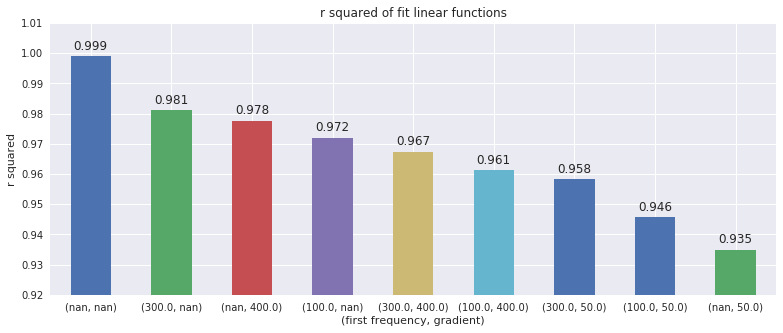

In [70]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (13,5)

ax = errors.sort_values(by="r_squared", ascending=False).plot(kind="bar", x=['f1', 'grad'], y='r_squared', legend=False, ylim=(0.92, 1.01), rot=0)
plt.suptitle("")
plt.title("r squared of fit linear functions")
plt.xlabel("(first frequency, gradient)")
plt.ylabel("r squared")
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()